<a href="https://colab.research.google.com/github/paulsoumyadip/ted_talk_views_prediction/blob/main/Ted_Talks_Views_Prediction_Regression_Capstone_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 

*   # **PROJECT NAME : *TED TALKS VIEWS PREDICTION***
*** ***
*   # **PROJECT OBJECTIVE : *TO PREDICT THE VIEWS OF A VIDEO UPLOADED TO TEDx WEBSITE***









## **PROBLEM DESCRIPTION/ BUSINESS CONTEXT :-**

******
* *TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.*

* *Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life.*

* *As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore , Jimmy Wales, Shahrukh Khan, and Bill Gates.*

* *The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.*

*****

**DATA USED** : *data_ted_talks.csv* - *provided by AlmaBetter*
******

### *Even though TED talks are quite popular these days but we would still like to give a small description*
##**What is TED Talks?**

*A **TED talk** is a **public speaking** event in the form of **recorded video** presentation which was originally aired at the main TED annual event. TED refers to Technology, Entertainment, Design. TED Conferences, LLC is an American-Canadian non-profit media organization that has the main ideology of finding and sharing knowledge of the experts from different fields amoung the community.*

*TED was founded by Richard Saul Wurman and Harry Marks in February 1984 as a tech conference. Till date more than 13000 TED event has been held in 150 countries by TED and its sister TEDx for free consumption by all sorts of people. TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates are among the luminaries on its speaker roster.*


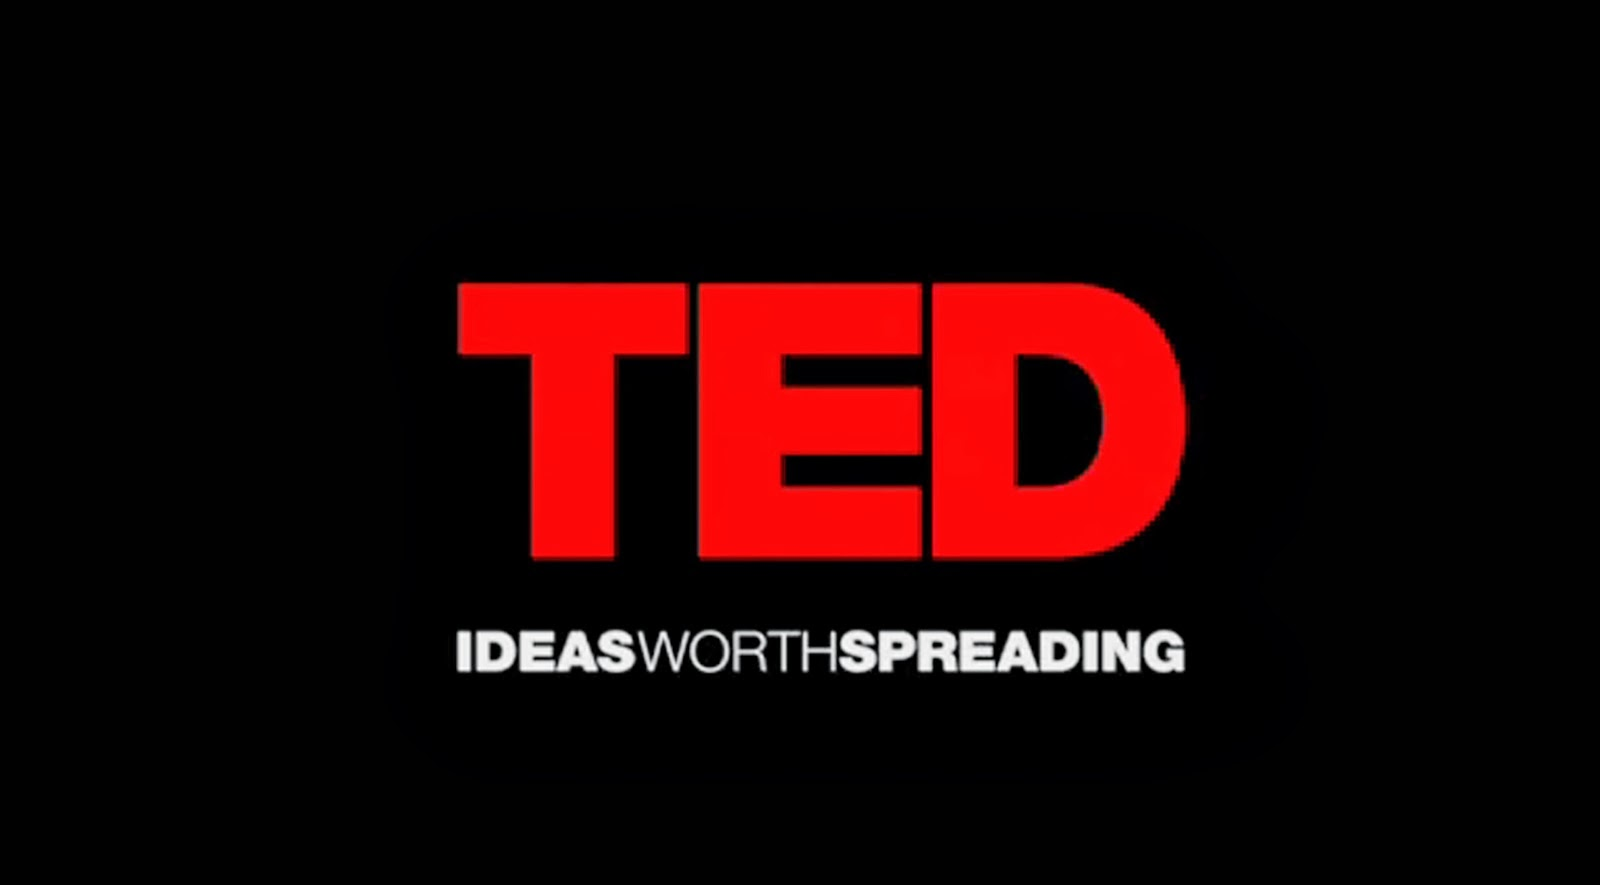


***The main goal is to create a prediction model using Supervised Regression so that it may be used to foretell how many people will watch a certain video that has been posted to TEDx website.***

##*So Let's Begin!*

## ***Project Work flow :***

* #### *Importing Libraries*
* #### *Loading the Dataset*
* #### *EDA on features*
* #### *Feature Engineering*
* #### *Data Cleaning*
* #### *Feature selection*
* #### *Fitting the regression models and HyperParameter Tuning*
* #### *Comparison of Models*
* #### *Final selection of the model*


******

# **DATA PREPARATION:**

In [1]:
# importing data manuplation and data visualization libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import ast
# importing necessary classes from sci-kit learn library for imputing null values.

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# importing WordCloud class from wordcloud class for Data Analysis.

from wordcloud import WordCloud,ImageColorGenerator

# importing required classes for model selection.

from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# importing various machine learning models.

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# importing classes of sci-kit learn for checking multicollinearity and feature selection.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# importing model evaluation metrics.

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# importing warnings library to avoid unnecessary warnings.

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Importing the Dataset:
tedtalk_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/Regression Capstone/Data Set for Ted Talks Views Prediction/data_ted_talks.csv")

In [3]:
tedtalk_df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [4]:
#Checking the column names:
tedtalk_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

*The views column is the dependent variable rest of them are feature column*

*Let's see if we can understand what do these columns mean:*





***The dataset contains features like:***


*   talk_id: Talk identification number provided by TED

*    title: Title of the talk

*     speaker_1: First speaker in TED's speaker list

*    all_speakers: Speakers in the talk

*    occupations: Occupations of the speakers

*    about_speakers: Blurb about each speaker

*    recorded_date: Date the talk was rcorded

*    published_date: Date the talk was published to TED.com

*    event: Event or medium in which the talk was given

*   native_lang: Language the talk was given in

*   available_lang: All available languages (lang_code) for a talk

*   comments: Count of comments

*   duration: Duration in seconds

*   topics: Related tags or topics for the talk

*   related_talks: Related talks (key='talk_id',value='title')

*   url: URL of the talk

*   description: Description of the talk

*   transcript: Full transcript of the talk

***And the target variable***

*  views : Count of views



###**Let's try to get the basic info of out Data set in an organized manner using a function:**

In [5]:
#function to get a summary of our Dataset
def DataInfoAll(df):
    print(f"Dataset Shape: {df.shape}")
    print("-"*75)
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Null/ Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Row'] = df.iloc[0].values
    summary['Second Row'] = df.iloc[1].values
    

    return summary

In [6]:
DataInfoAll(tedtalk_df)

Dataset Shape: (4005, 19)
---------------------------------------------------------------------------


,Name,dtypes,Null/ Missing,Uniques,First Row,Second Row
0,talk_id,int64,0,4005,1,92
1,title,object,0,4005,Averting the climate crisis,The best stats you've ever seen
2,speaker_1,object,0,3274,Al Gore,Hans Rosling
3,all_speakers,object,4,3306,{0: 'Al Gore'},{0: 'Hans Rosling'}
4,occupations,object,522,2049,{0: ['climate advocate']},{0: ['global health expert; data visionary']}
5,about_speakers,object,503,2977,{0: 'Nobel Laureate Al Gore focused the world’...,"{0: 'In Hans Rosling’s hands, data sings. Glob..."
6,views,int64,0,3996,3523392,14501685
7,recorded_date,object,1,1334,2006-02-25,2006-02-22
8,published_date,object,0,2962,2006-06-27,2006-06-27
9,event,object,0,459,TED2006,TED2006


**We can clearly see that there are a few missing values in**


*   *occupations*
*   *about_speakers*
*   *comments*


 **and most of the feature variables are categorical.**
******


In [7]:
#NaN values in 'comment' can be converted to 0
tedtalk_df['comments'].fillna(0, inplace = True)
#Dropping the only NaN in 'recorded_date'
tedtalk_df = tedtalk_df.dropna(subset= ['recorded_date'])
#Dropping the NaN values in all_speakers column
tedtalk_df = tedtalk_df.dropna(subset= ['all_speakers'])
#Changing the NaN values of 'occupation' column to - Not available
tedtalk_df['occupations'].fillna(str({0:' Not available'}),inplace=True,axis=0)
#Changing the NaN values of 'about_speakers' column to - Not available
tedtalk_df['about_speakers'].fillna(str({0:' Not available'}),inplace=True,axis=0)

In [8]:
tedtalk_df.isna().sum()

talk_id           0
title             0
speaker_1         0
all_speakers      0
occupations       0
about_speakers    0
views             0
recorded_date     0
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
related_talks     0
url               0
description       0
transcript        0
dtype: int64


**We can se no that there are no NaN values left, now we can proceed to do other stuffs**
******
***Let's check for duplicate coloumns:***



In [9]:
tedtalk_df.duplicated().sum()

0

*There is no duplicate values, that's a good sign*

### **Categorizing Variable types:**
* data_categorical = data[['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'native_lang', 'available_lang', 'comments', 'topics', 'related_talks', 'url', 'description', 'transcript']] 


* data_numerical= data[['talk_id','views', 'duration']]


* data_target_variable(Y)  = data[['views']]

In [10]:
tedtalk_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [11]:
data_numerical= tedtalk_df[['views', 'duration','comments','talk_id']]

data_categorical= tedtalk_df[['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'native_lang', 'available_lang', 'topics', 'related_talks', 'url', 'description', 'transcript']]


*Before we start with other columns let's change the the dates from object to Datetime format.*

In [12]:
tedtalk_df['recorded_date'] = pd.to_datetime(tedtalk_df['recorded_date'], format = '%Y-%m-%d')
tedtalk_df['published_date'] = pd.to_datetime(tedtalk_df['published_date'], format = '%Y-%m-%d')

In [13]:
# extracting date, month, year from published date and adding to dataset
from datetime import datetime
from datetime import timedelta
import calendar

#Extracting month from published_date column
tedtalk_df['published_month'] = pd.DatetimeIndex(tedtalk_df['published_date']).month
tedtalk_df['published_month'] = tedtalk_df['published_month'].apply(lambda x: calendar.month_abbr[x])

#Extracting day from published_date column
tedtalk_df['published_day'] = pd.DatetimeIndex(tedtalk_df['published_date']).day

#Extracting year from published_date column
tedtalk_df['published_year'] = pd.DatetimeIndex(tedtalk_df['published_date']).year

#Extracting week day from published_date
tedtalk_df['dayofweek'] = tedtalk_df['published_date'].dt.day_name()

#converting day of week to day [1-mon,2-tue,3-wed,4-thr,5-fri,6-sat,0-sun]
tedtalk_df['dayofweek_num']= tedtalk_df['published_date'].apply(lambda a: a.strftime("%w")).astype('int64')

#calculating video age with respect to day by adding one day to last data value
tedtalk_df['video_age_day'] = tedtalk_df['published_date'].max() + timedelta(days=1)-(pd.DatetimeIndex(tedtalk_df['published_date']))
tedtalk_df['video_age_day'] = tedtalk_df['video_age_day'].dt.days
tedtalk_df.tail(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,related_talks,url,description,transcript,published_month,published_day,published_year,dayofweek,dayofweek_num,video_age_day
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,...,"{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...,Apr,28,2020,Tuesday,2,3
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},{0: ' Not available'},{0: ' Not available'},56582,2020-04-28,2020-04-30,TED-Ed,...,{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ...",Apr,30,2020,Thursday,4,1
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},{0: ' Not available'},{0: ' Not available'},0,2020-04-30,2020-04-30,TED-Ed,...,"{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...,Apr,30,2020,Thursday,4,1


In [14]:
#Creating a daily average views section
tedtalk_df['avg_daily_views'] = tedtalk_df['views'] / tedtalk_df['video_age_day']
tedtalk_df.sample(8)


,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,url,description,transcript,published_month,published_day,published_year,dayofweek,dayofweek_num,video_age_day,avg_daily_views
3999,62748,A global pandemic calls for global solutions,Larry Brilliant,"{0: 'Larry Brilliant', 1: 'Chris Anderson'}","{0: ['epidemiologist', 'philanthropist'], 1: [...","{0: ""TED Prize winner Larry Brilliant has spen...",760969,2020-04-22,2020-04-24,TED2020: The Prequel,...,https://www.ted.com/talks/larry_brilliant_a_gl...,Examining the facts and figures of the coronav...,"Helen Walters: So, Chris, who's up first? Chri...",Apr,24,2020,Friday,5,7,108709.857143
2473,2854,How your pictures can help reclaim lost history,Chance Coughenour,{0: 'Chance Coughenour'},{0: ['digital archaeologist']},"{0: ""Chance Coughenour is recreating heritage ...",975103,2016-06-08,2017-08-31,TEDxHamburg,...,https://www.ted.com/talks/chance_coughenour_ho...,Digital archaeologist Chance Coughenour is usi...,Why do people deliberately destroy cultural he...,Aug,31,2017,Thursday,4,974,1001.132444
2388,2772,How (and why) Russia hacked the US election,Laura Galante,{0: 'Laura Galante'},{0: ['cyberspace analyst']},{0: 'Laura Galante profiles advanced cyber thr...,2587374,2017-04-24,2017-05-03,TED2017,...,https://www.ted.com/talks/laura_galante_how_an...,"Hacking, fake news, information bubbles ... al...",Let's say you despise Western democracy. Democ...,May,3,2017,Wednesday,3,1094,2365.058501
599,772,The wireless future of medicine,Eric Topol,{0: 'Eric Topol'},{0: ['cardiologist and geneticist']},{0: 'Eric Topol is a leading cardiologist who ...,786641,2009-10-10,2010-02-23,TEDMED 2009,...,https://www.ted.com/talks/eric_topol_the_wirel...,Eric Topol says we'll soon use our smartphones...,Does anybody know when the stethoscope was inv...,Feb,23,2010,Tuesday,2,3720,211.462634
3389,38286,Why we need more dogs in hospitals,Yuko Morita,"{0: 'Yuko Morita', 1: ' Bailey'}",{0: ' Not available'},{0: 'ファシリティドッグ・ハンドラー\r\n\r\n静岡県函南町生まれ。静岡県立大学看護...,41919,2015-03-07,2019-04-05,TEDxShimizu,...,https://www.ted.com/talks/yuko_morita_why_we_n...,In this moving talk — guest-starring her canin...,"(Directing Bailey in English) Hello, everyone....",Apr,5,2019,Friday,5,392,106.936224
3287,24447,How to practice effectively...for just about a...,Annie Bosler,{0: 'Annie Bosler'},{0: ' Not available'},"{0: ""French hornist Dr. Annie Bosler wears man...",6796631,2017-02-27,2019-03-08,TED-Ed,...,https://www.ted.com/talks/annie_bosler_and_don...,Mastering any physical skill takes practice. P...,"Mastering any physical skill, be it performing...",Mar,8,2019,Friday,5,420,16182.454762
47,10,The killer American diet that's sweeping the p...,Dean Ornish,{0: 'Dean Ornish'},"{0: ['physician', 'author']}","{0: ""Dean Ornish is a clinical professor at UC...",2690694,2006-02-23,2006-12-14,TED2006,...,https://www.ted.com/talks/dean_ornish_the_kill...,Forget the latest disease in the news: Cardiov...,With all the legitimate concerns about AIDS an...,Dec,14,2006,Thursday,4,4887,550.581952
714,938,Inside an Antarctic time machine,Robert Lee Hotz,{0: 'Robert Lee Hotz'},{0: ['journalist']},{0: 'Robert Lee Hotz is the science columnist ...,625868,2010-07-14,2010-08-24,TEDGlobal 2010,...,https://www.ted.com/talks/lee_hotz_inside_an_a...,Science columnist Lee Hotz describes a remarka...,"Come with me to the bottom of the world, Antar...",Aug,24,2010,Tuesday,2,3538,176.898813


**We can now see that the recorded_date and published_date columns are now in datetime format.**

# **EXPLORATORY DATA ANALYSIS AND VISUALIZATION** 

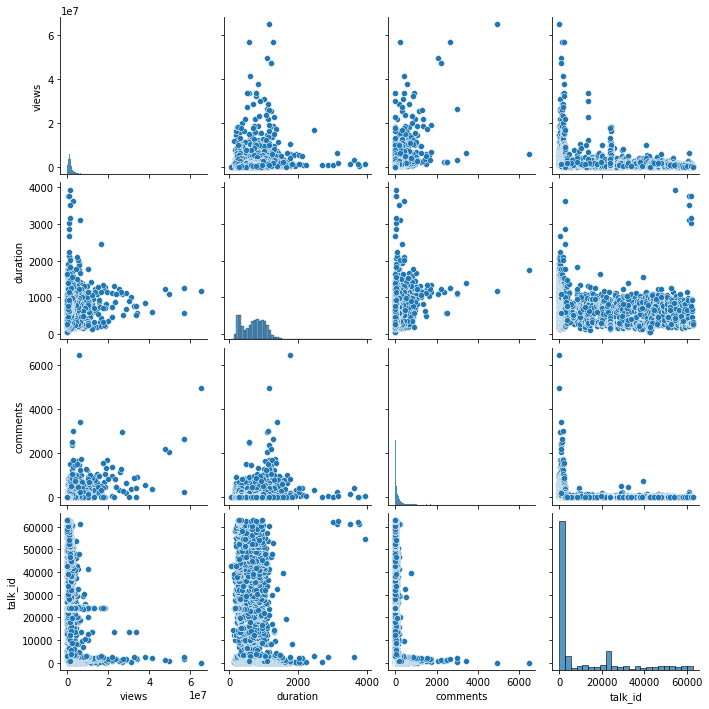

In [15]:
sns.pairplot(data_numerical)
plt.show()

**We can see that there are outliers in almost all numerical columns.**

**Let's find the speaker with the highest views:**

In [16]:
df_2 = tedtalk_df.groupby('speaker_1').agg({'views':'sum'})
df_2 = df_2.sort_values(['views'],ascending = False).reset_index().head(10)


Text(0.5, 1.0, 'Count')

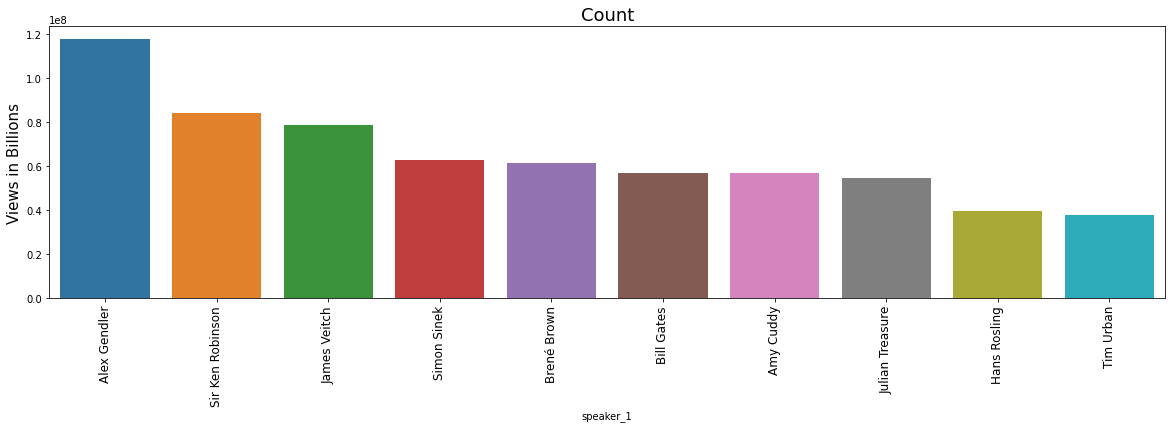

In [17]:
plt.subplots(figsize=(20,5))
sns.barplot(data= df_2, x='speaker_1',y= 'views')
plt.xticks(rotation = 90, fontsize=12)
plt.ylabel('Views in Billions',fontsize = 15)
plt.title('Count',fontsize = 18)

*Alex Gendler has highest views count followed by Sir Ken Robinson and james veitch*

In [18]:
pop_speaker=tedtalk_df.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_speaker=pop_speaker.to_dict()
pop_speaker=pop_speaker.values()
pop_speaker=  list(pop_speaker)[0]
tedtalk_df['speaker_1_avg_views']=tedtalk_df['speaker_1'].map(pop_speaker)
     

**Top five video with the highest views:**

In [19]:
df_1 = tedtalk_df.sort_values(['views'],ascending=False).head()
df_1[['title','speaker_1', 'views' ]] 


,title,speaker_1,views
4,Do schools kill creativity?,Sir Ken Robinson,65051954
1296,Your body language may shape who you are,Amy Cuddy,57074270
2062,This is what happens when you reply to spam email,James Veitch,56932551
646,How great leaders inspire action,Simon Sinek,49730580
796,The power of vulnerability,Brené Brown,47544833


*Sir Ken Robinson's talk on "Do Schools Kill Creativity?" is the most popular TED Talk of all time with more than 65 million views.*

*It is closely followed by Amy Cuddy talk on "Your body language may shape who you are" with more than 57 million views.*

*There is only one talk that has crossed 60 million mark while 3 talks have crossed 50 million mark.*

**Most popular event in TED talks**

In [20]:
df_3 = tedtalk_df.groupby('event').agg({'views':'sum'})
df_3 = df_3.sort_values(['views'],ascending = False).reset_index().head(10)

Text(0.5, 1.0, 'Event')

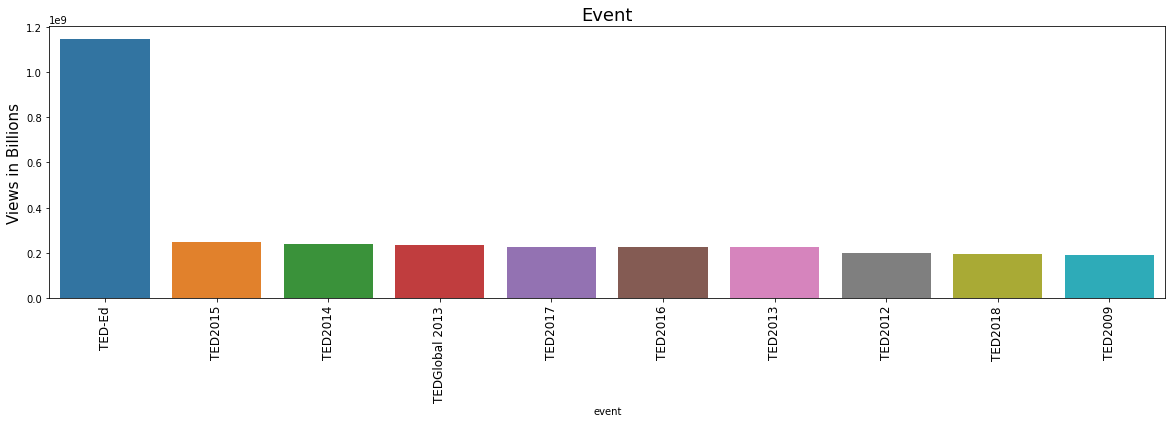

In [21]:
plt.subplots(figsize=(20,5))
sns.barplot(data= df_3, x='event',y= 'views')
plt.xticks(rotation = 90, fontsize=12)
plt.ylabel('Views in Billions',fontsize = 15)
plt.title('Event',fontsize = 18)

Text(0.5, 1.0, 'Count')

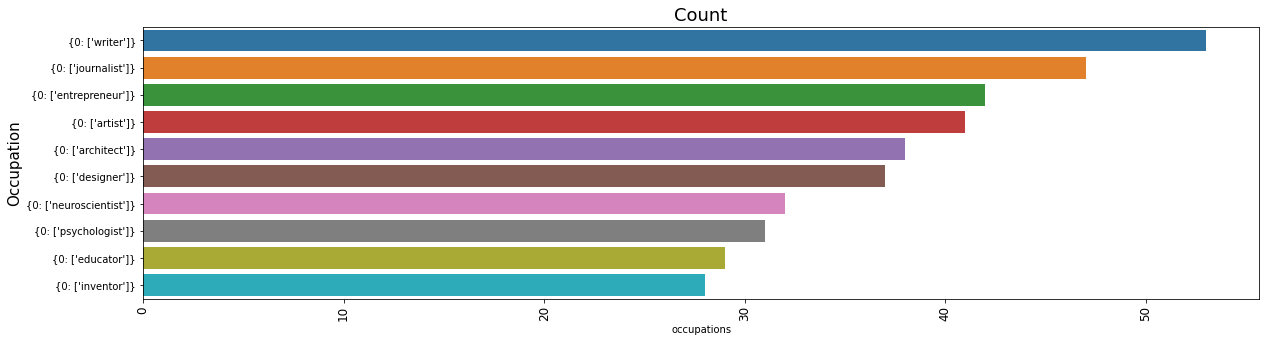

In [22]:
#Printing the top 15 most frequent speaker's occupations

plt.rcParams["figure.figsize"] = (15,4)

occ_df = tedtalk_df['occupations'].value_counts()[1:].head(10).reset_index()

plt.subplots(figsize=(20,5))
sns.barplot(x = occ_df['occupations'], y = occ_df['index'])
plt.xticks(rotation = 90, fontsize=12)
plt.ylabel('Occupation',fontsize = 15)
plt.title('Count',fontsize = 18)

**Most of the speakers are writer followed by journalist and enterprenuer.**

### **Let's explore the title column and visualize the most frequent words in title:**

There are 156929 words in the combination of all titles.


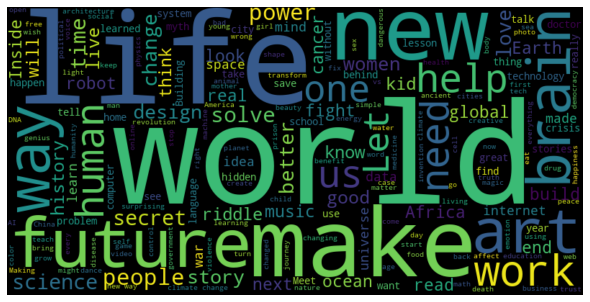

In [23]:
#importing the wordcloud
from wordcloud import WordCloud,ImageColorGenerator
     

#making of word cloud from title column
text = " ".join(topic for topic in tedtalk_df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud( width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### **Let's visualize most popular topic tags with word cloud**

There are 403714 words in the combination of all topics.


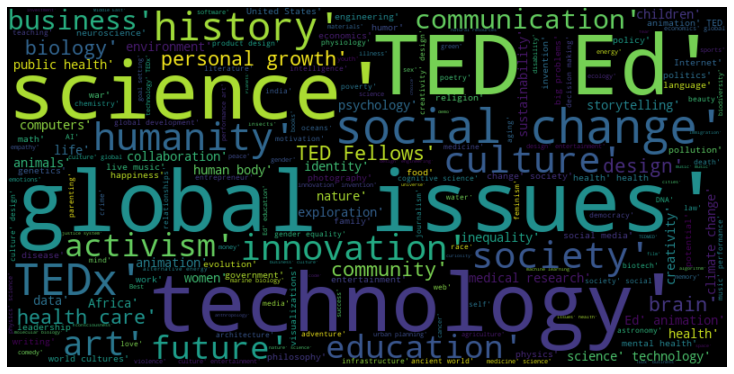

In [24]:
text = " ".join(topic for topic in tedtalk_df.topics.astype(str))
print ("There are {} words in the combination of all topics.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

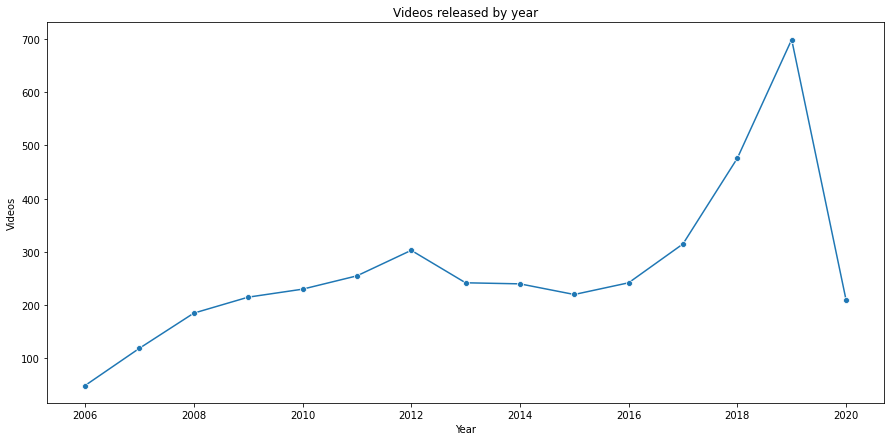

In [25]:
plt.figure(figsize=(15,7))
sns.lineplot(data=tedtalk_df['published_year'].value_counts(),marker = 'o');
plt.xlabel('Year');
plt.ylabel('Videos');
plt.title('Videos released by year');

**The quantity of videos were gradually increasing every year but dropped drastically in 2020 due to pandemic**

**Let's check during which days most videos are released and what are it's view count:**

Text(0.5, 1.0, 'Day of The Week vs No.of Videos Uploaded')

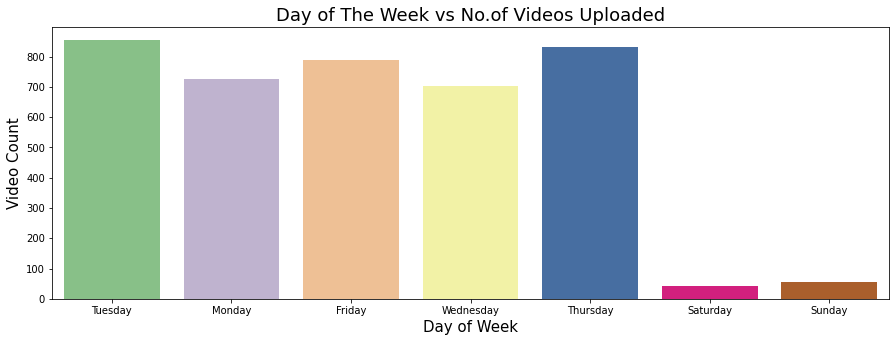

In [26]:
sns.countplot(data = tedtalk_df ,x='dayofweek',palette ='Accent')
plt.xlabel('Day of Week',fontsize = 15)
plt.ylabel('Video Count',fontsize = 15)
plt.title('Day of The Week vs No.of Videos Uploaded',fontsize = 18)


Text(0.5, 1.0, 'Day of The Week vs Views in Billions')

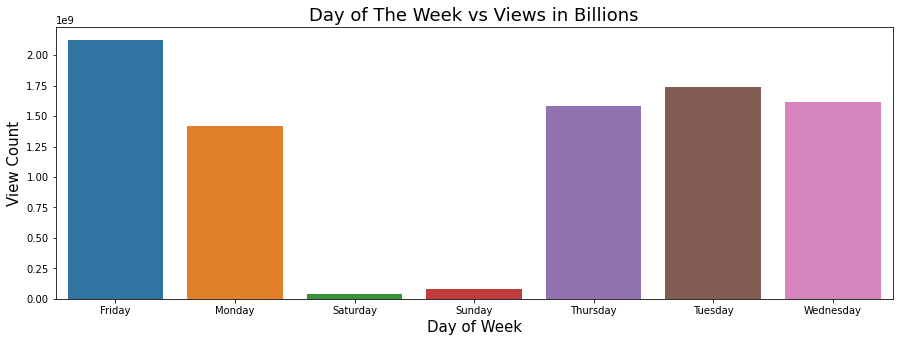

In [27]:
total_views = tedtalk_df.groupby('dayofweek')['views'].sum().reset_index()
sns.barplot(x='dayofweek',y='views' ,data =total_views)
plt.xlabel('Day of Week',fontsize = 15)
plt.ylabel('View Count',fontsize = 15)
plt.title('Day of The Week vs Views in Billions',fontsize = 18)

*  *From first bar graph we can clearly see that most of the TED talks are released in non-weekend days.*
*  *Most of the TED talks are released on Tuesday and Thursday followed by Friday.*
*  *Second graph shows that most people watch TED talks on non-weekend days this is because of the reason that most of the TED talks are released in non-weekend days.*

**Let's check during which month most videos are released and what are it's view count:**

Text(0.5, 1.0, 'Month vs No. of videos')

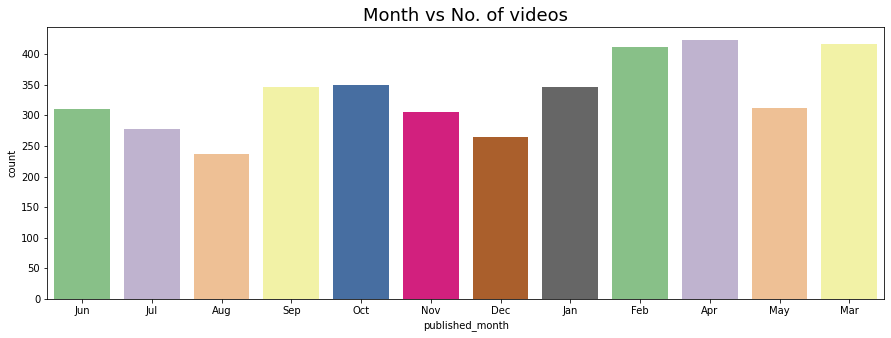

In [28]:
sns.countplot(data = tedtalk_df , x= 'published_month', palette ='Accent')
plt.title('Month vs No. of videos',fontsize = 18)

In [29]:
m_views = tedtalk_df.groupby('published_month')['views'].sum().reset_index()

Text(0.5, 1.0, 'Month vs Views ')

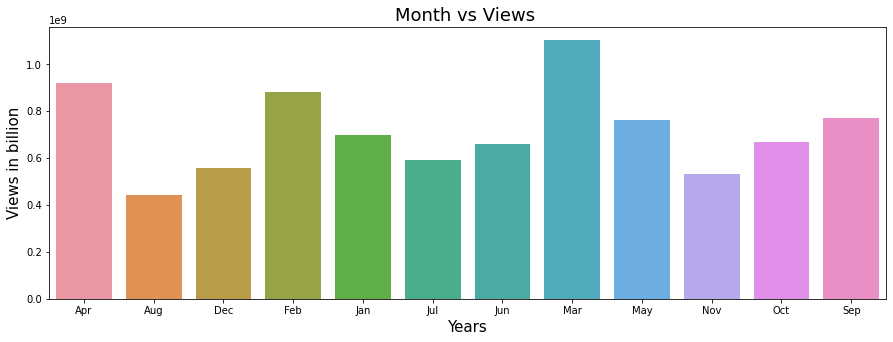

In [30]:
sns.barplot(x = 'published_month', y ='views', data= m_views)
plt.xlabel('Years',fontsize = 15)
plt.ylabel('Views in billion',fontsize = 15)
plt.title('Month vs Views ',fontsize = 18)

*  *From first graph on an average the number of talks released in the month of April, March followed by October are higher.*
*  *The number of talks released in August and December are comparitively lower than other months.*
*  *From second graph we can see that August, November and December months seems to have less views, While March and April months have most number of views.*

*****
**Let's check during which year most videos are released and what are it's view count:**

Text(0.5, 1.0, 'Year vs No. of videos')

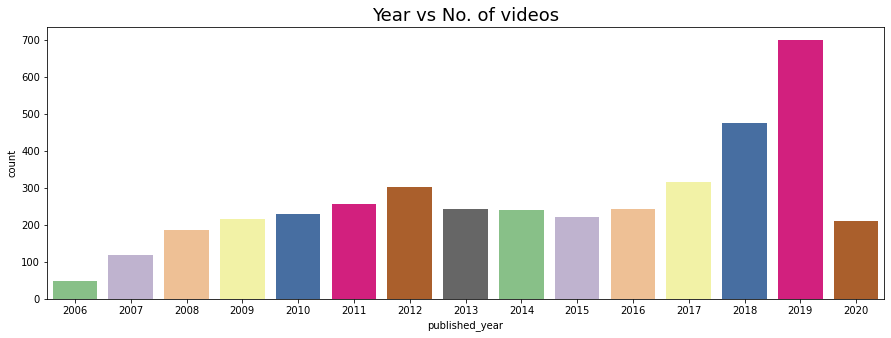

In [31]:
sns.countplot(data = tedtalk_df , x= 'published_year', palette ='Accent')
plt.title('Year vs No. of videos',fontsize = 18)

In [32]:
y_views = tedtalk_df.groupby('published_year')['views'].sum().reset_index()

Text(0.5, 1.0, 'Year vs Views ')

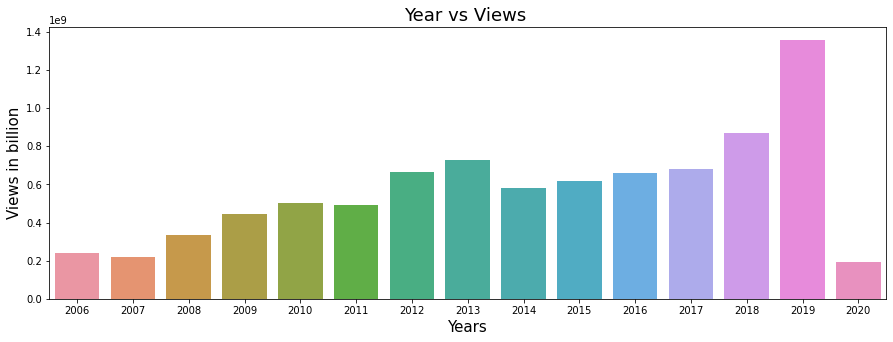

In [33]:
sns.barplot(x = 'published_year', y ='views', data= y_views)
plt.xlabel('Years',fontsize = 15)
plt.ylabel('Views in billion',fontsize = 15)
plt.title('Year vs Views ',fontsize = 18)

*  *From first bar graph the number of TED talks released in 2018 and 2019 higher followed by in 2012*
*  *From second bar graph we can get insight that the number of views are higher in 2013 and 2018 and less in 2006, 2007 and 2020.*

*****

*****
####**Now that we are done with the visualization of the colmns that we think are nessesary let's drop the unessesary columns and then we will feature columns we have:**

# **FEATURE SELECTION:**

In [34]:
tedtalk_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'published_month',
       'published_day', 'published_year', 'dayofweek', 'dayofweek_num',
       'video_age_day', 'avg_daily_views', 'speaker_1_avg_views'],
      dtype='object')

In [35]:
tedtalk_df.drop( columns = ['talk_id', 'title', 'speaker_1', 'recorded_date', 'published_date','about_speakers',
                                 'event', 'url','description','transcript','native_lang','related_talks', 'available_lang', 'topics', 'all_speakers', 'occupations'], inplace = True)

In [36]:
tedtalk_df.columns

Index(['views', 'comments', 'duration', 'published_month', 'published_day',
       'published_year', 'dayofweek', 'dayofweek_num', 'video_age_day',
       'avg_daily_views', 'speaker_1_avg_views'],
      dtype='object')

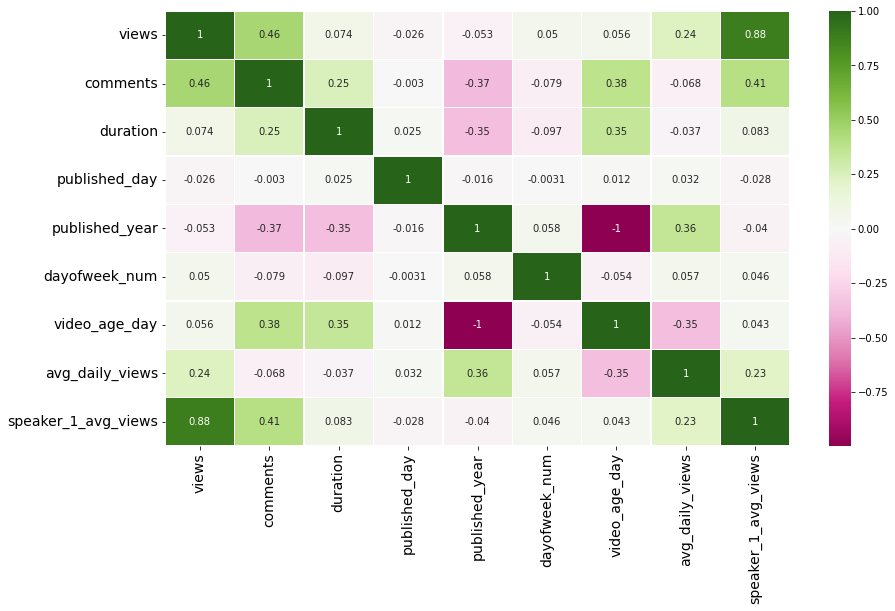

In [37]:
plt.figure(figsize = (14,8))
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
sns.heatmap(tedtalk_df.corr(), annot=True, linewidth=.5,cmap="PiYG");

**There is not much collineraity between the features, let's use get_dummies first and then we will try to check using VIF**

**Now we will apply get_dummies on the categorical columns of this Dataset:**

In [38]:
y = tedtalk_df['views']
X = tedtalk_df.drop(columns='views')

In [39]:
X = pd.get_dummies(X, drop_first= True)
print(X.shape)
X.sample(5)


(4000, 25)


,comments,duration,published_day,published_year,dayofweek_num,video_age_day,avg_daily_views,speaker_1_avg_views,published_month_Aug,published_month_Dec,...,published_month_May,published_month_Nov,published_month_Oct,published_month_Sep,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday
17,168.0,1170,15,2006,2,5008,254.153954,1272803.0,1,0,...,0,0,0,0,0,0,0,0,1,0
3603,0.0,269,26,2019,1,249,1311.441767,3459399.5,1,0,...,0,0,0,0,1,0,0,0,0,0
3544,36.0,636,27,2019,4,309,9799.588997,3028073.0,0,0,...,0,0,0,0,0,0,0,1,0,0
2557,42.0,843,2,2017,4,911,4963.760703,4521986.0,0,0,...,0,1,0,0,0,0,0,1,0,0
2888,0.0,278,26,2018,4,645,1152.406202,743302.0,0,0,...,0,0,0,0,0,0,0,1,0,0


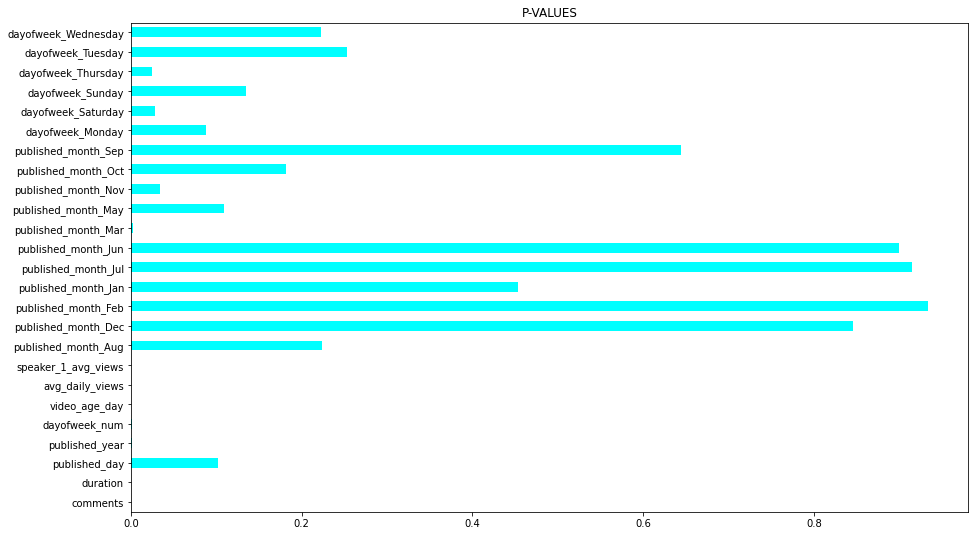

In [40]:
f_scores = f_regression(X, y)
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='barh',color='aqua',figsize=(15,9))
plt.title('P-VALUES')
plt.show()


In [41]:
selected_features = np.where(p_values<0.005)[0]
X=X.iloc[0:,selected_features]

In [42]:
#fuction to calculate VIF in a Dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc(X):
    
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
    return(vif)

In [43]:
vif_calc(X)

,variables,VIF
0,comments,1.868723
1,duration,5.912193
2,published_year,11.205721
3,dayofweek_num,5.352987
4,video_age_day,4.071483
5,avg_daily_views,1.455682
6,speaker_1_avg_views,1.956692
7,published_month_Mar,1.134951


*So we can see the published_year column has high VIF so let's drop this*

In [44]:
X.drop(columns =['published_year'],inplace = True)

In [45]:
vif_calc(X)

,variables,VIF
0,comments,1.858471
1,duration,4.318424
2,dayofweek_num,3.095750
3,video_age_day,3.771388
4,avg_daily_views,1.413479
5,speaker_1_avg_views,1.939468
6,published_month_Mar,1.129118


**All the VIF values are below 10 so we are good to Go!**

In [46]:
X.drop(columns =['published_month_Mar'],inplace = True)

# **MODEL IMPLEMENTATION:**

A model defines the relationship between features and label.A feature is an input variable—the x variable in simple linear regression.A label is the thing we're predicting—the y variable in simple linear regression.Training means creating or learning the model.In order to build the predictive model, it's time to implement some of the model training on the above selected feeature.
Following algorithms have been used for predictions:-

* Linear Regression
* Lasso Regression
* Ridge Regression
* Elastic Net Regression
* Decision Tree
* Random Forest Regression
* GradientBoostingRegressor
* XGB Regression

In [47]:
#train_test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 23)

### **LINEAR REGRESSION:**

In [48]:
# Fitting the model.

reg = LinearRegression().fit(X_train, y_train)

# Predicting the values for train and test data.
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
LR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , LR_Train_MAE)
LR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , LR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
LR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , LR_Train_MSE)
LR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , LR_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
LR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , LR_Train_RMSE)
LR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , LR_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
LR_Train_R2 = r2_score((y_train), (y_train_pred))
print("Train R2 :" , LR_Train_R2)
LR_Test_R2 = r2_score((y_test), (y_test_pred))
print("Test R2 :" , LR_Test_R2)

# Adjusted R2 of Training and Testing Data.
LR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", LR_Adjusted_R2)


Train Data MAE : 520942.11803447397
Test Data MAE : 506016.2215197347
Train Data MSE : 2465262371676.342
Test Data MSE : 2161158275342.4612
Train Data RMSE: 1570115.4007512766
Test Data RMSE: 1470087.8461311287
Train R2 : 0.8040455817293498
Test R2 : 0.7667394422718335
Adjusted R2 :  0.7649745452398424


### **LASSO REGULARIZATION:**

In [49]:
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,20000]}
lasso = Lasso()
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 20000]},
             scoring='neg_mean_squared_error')

In [50]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)
     

The best fit alpha value is found out to be : {'alpha': 50}

Using  {'alpha': 50}  the negative mean squared error is:  -2654019895639.861


In [51]:
#Fitting the model.

lasso  = Lasso(alpha=1e-13 , max_iter= 3000)
lasso.fit(X_train, y_train)

# Predicting the values for train and test data.
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
LA_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , LA_Train_MAE)
LA_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , LA_Test_MAE)

# Mean Squared Error of Training and Testing Data.
LA_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , LA_Train_MSE)
LA_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , LA_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
LA_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , LA_Train_RMSE)
LA_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , LA_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
LA_Train_R2 = r2_score((y_train), (y_train_pred))
print("Train R2 :" , LA_Train_R2)
LA_Test_R2 = r2_score((y_test), (y_test_pred))
print("Test R2 :" , LA_Test_R2)

# Adjusted R2 of Training and Testing Data.
LA_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", LA_Adjusted_R2)

Train Data MAE : 520942.11803447397
Test Data MAE : 506016.2215197347
Train Data MSE : 2465262371676.342
Test Data MSE : 2161158275342.4612
Train Data RMSE: 1570115.4007512766
Test Data RMSE: 1470087.8461311287
Train R2 : 0.8040455817293498
Test R2 : 0.7667394422718335
Adjusted R2 :  0.7649745452398424


### **RIDGE REGULARIZATION:**

In [52]:
RI = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,6000,7000,8000]}
R_R = GridSearchCV(RI, parameters, cv=5)
R_R.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 6000, 7000, 8000]})

In [53]:
print(R_R.best_params_)

{'alpha': 6000}


In [54]:
# Predicting the values for train and test data.
y_train_pred = R_R.predict(X_train)
y_test_pred = R_R.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
RR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , RR_Train_MAE)
RR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , RR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
RR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , RR_Train_MSE)
RR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , RR_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
RR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , RR_Train_RMSE)
RR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , RR_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
RR_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , RR_Train_R2)
RR_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , RR_Test_R2)

# Adjusted R2 of Training and Testing Data.
RR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", RR_Adjusted_R2)

Train Data MAE : 515877.706236404
Test Data MAE : 499442.2256319286
Train Data MSE : 2466592511427.3867
Test Data MSE : 2156905523473.539
Train Data RMSE: 1570538.9238816677
Test Data RMSE: 1468640.7060522118
R2 : 0.8039398539317208
R2 : 0.7671984550540728
Adjusted R2 :  0.7654370310065626


### **ELASTIC NET REGULARIZATION:**

In [55]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [56]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5, 'l1_ratio': 0.7}

Using  {'alpha': 5, 'l1_ratio': 0.7}  the negative mean squared error is:  -2652976535549.629


In [57]:
# Predicting the values for train and test data.
y_train_pred = elastic_regressor.predict(X_train)
y_test_pred = elastic_regressor.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
ER_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , ER_Train_MAE)
ER_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , ER_Test_MAE)

# Mean Squared Error of Training and Testing Data.
ER_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , ER_Train_MSE)
ER_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , ER_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
ER_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , ER_Train_RMSE)
ER_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , ER_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
ER_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , ER_Train_R2)
ER_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , ER_Test_R2)

# Adjusted R2 of Training and Testing Data.
ER_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", ER_Adjusted_R2)


Train Data MAE : 516223.51886922395
Test Data MAE : 499899.50130952225
Train Data MSE : 2466299398024.7515
Test Data MSE : 2157268281767.1985
Train Data RMSE: 1570445.6049238865
Test Data RMSE: 1468764.2022350621
R2 : 0.803963152411818
R2 : 0.7671593014192535
Adjusted R2 :  0.7653975811273437


### **DECISION TREE REGRESSION:**

In [58]:
param_grid = {'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],'criterion':['mse','mae']}
CV = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid, cv=5)
CV.fit(X_train,y_train)
CV.best_params_


{'criterion': 'mse', 'max_depth': 11}

In [59]:
# Fitting the model.

DTR = DecisionTreeRegressor(criterion = 'mse', max_depth=4)
DTR.fit(X_train,y_train)

# Predicting the values for train and test data.
y_train_pred = DTR.predict(X_train)
y_test_pred = DTR.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
DTR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , DTR_Train_MAE)
DTR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , DTR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
DTR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , DTR_Train_MSE)
DTR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , DTR_Test_MSE)

# Root Mean Squared error of test data.
DTR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , DTR_Train_RMSE)
DTR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE :" , DTR_Test_RMSE)

# Coefficient of determination of test data.
DTR_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , DTR_Train_R2)
DTR_Test_R2 = r2_score((y_test), (y_test_pred))
print("Test R2 :" , DTR_Test_R2)

# Adjusted R2 of test data.
DTR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", DTR_Adjusted_R2)

Train Data MAE : 560377.7962065306
Test Data MAE : 669496.9914704806
Train Data MSE : 1683417511538.3594
Test Data MSE : 5755480159812.405
Train Data RMSE: 1297465.8036103917
Test Data RMSE : 2399058.1818314465
R2 : 0.8661914841316399
Test R2 : 0.3787930632435985
Adjusted R2 :  0.3740928846552777


###**RANDOM FOREST REGRESSOR:**

In [60]:
RFR = RandomForestRegressor(n_estimators = 10, random_state = 23)

In [61]:
RFR.fit(X_train, y_train)
y_train_pred = RFR.predict(X_train)
y_test_pred = RFR.predict(X_test)
     

# Mean Absolute Error of Training and Testing Data.
RFR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , RFR_Train_MAE)
RFR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , RFR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
RFR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , RFR_Train_MSE)
RFR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , RFR_Test_MSE)

# Root Mean Squared error of test data.
RFR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , RFR_Train_RMSE)
RFR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE :" , RFR_Test_RMSE)

# Coefficient of determination of test data.
RFR_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , RFR_Train_R2)
RFR_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , RFR_Test_R2)

# Adjusted R2 of test data.
RFR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", RFR_Adjusted_R2)

Train Data MAE : 131205.00896875001
Test Data MAE : 348918.61799999996
Train Data MSE : 277300052388.1312
Test Data MSE : 1785937782700.608
Train Data RMSE: 526592.8715698032
Test Data RMSE : 1336389.8318606769
R2 : 0.9779584635386342
R2 : 0.8072381611224031
Adjusted R2 :  0.805779685670618


**Hyperparameter tuning in Random forest Regressor:**

In [62]:
RFR_H = RandomForestRegressor(criterion='mae')
grid_values = {'n_estimators':[50, 60, 70, 80, 90, 100 ], 'max_depth':[ 3, 4, 5, 6, 7]}
RFR_H_grid = GridSearchCV(RFR_H, param_grid = grid_values, cv=3, n_jobs=-1)

# Fit the object to train dataset
RFR_H_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(criterion='mae'), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [50, 60, 70, 80, 90, 100]})

In [63]:
RFR_H_grid_optimal_model = RFR_H_grid.best_estimator_
     

y_train_pred =  RFR_H_grid_optimal_model.predict(X_train)
y_test_pred  = RFR_H_grid_optimal_model.predict(X_test)
     

In [64]:
# Mean Absolute Error of Training and Testing Data.
RFR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , RFR_Train_MAE)
RFR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , RFR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
RFR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , RFR_Train_MSE)
RFR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , RFR_Test_MSE)

# Root Mean Squared error of test data.
RFR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , RFR_Train_RMSE)
RFR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE :" , RFR_Test_RMSE)

# Coefficient of determination of test data.
RFR_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , RFR_Train_R2)
RFR_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , RFR_Test_R2)

# Adjusted R2 of test data.
RFR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", RFR_Adjusted_R2)

Train Data MAE : 258096.57563392856
Test Data MAE : 362071.9350357143
Train Data MSE : 801252314554.1516
Test Data MSE : 2227327307795.9497
Train Data RMSE: 895126.9823629224
Test Data RMSE : 1492423.300473411
R2 : 0.9363114721620047
R2 : 0.759597612082655
Adjusted R2 :  0.7577786785044658


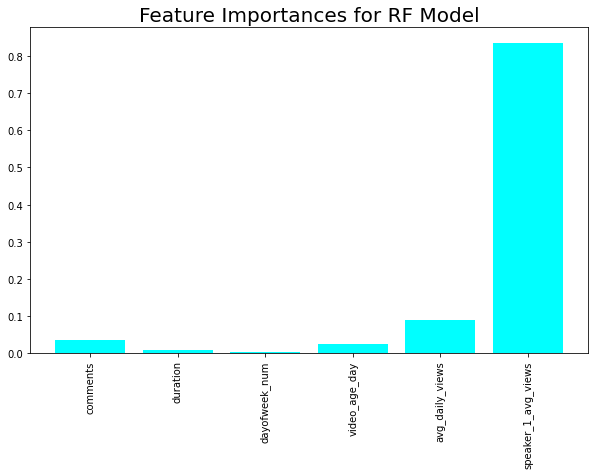

In [65]:
# getting features according to their importance in prediction

features = X_train.columns
importances = RFR_H_grid.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.bar(x=features, height=importances, color='aqua')
plt.title('Feature Importances for RF Model', size=20)
plt.xticks(rotation='vertical')
plt.show()
     

### **GRADIENT BOOST REGRESSOR:**

In [66]:
grid = dict()
grid['n_estimators'] = [1, 3, 5, 10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0, 100]
grid['max_depth'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


grid_search_gb = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid=grid, n_jobs=-1, cv=5)
grid_result = grid_search_gb.fit(X_train , y_train)
print(grid_result.best_params_)


{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}


In [67]:
# Predicting the values for train and test data.
y_train_pred = grid_result.predict(X_train)
y_test_pred = grid_result.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
GB_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , GB_Train_MAE)
GB_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , GB_Test_MAE)

# Mean Squared Error of Training and Testing Data.
GB_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , GB_Train_MSE)
GB_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , GB_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
GB_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , GB_Train_RMSE)
GB_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , GB_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
GB_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , GB_Train_R2)
GB_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , GB_Test_R2)

# Adjusted R2 of Training and Testing Data.
GB_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", GB_Adjusted_R2)

Train Data MAE : 167045.3712919779
Test Data MAE : 301298.3933732442
Train Data MSE : 108596790102.90074
Test Data MSE : 1625701081773.864
Train Data RMSE: 329540.27083635883
Test Data RMSE: 1275029.835640666
R2 : 0.9913680502833442
R2 : 0.8245330083592493
Adjusted R2 :  0.8232053892547795


### **XG BOOST REGRESSOR:**

In [68]:
xgb = XGBRegressor(learning_rate=0.1)
grid_values = {'n_estimators':[10, 30, 50, 80, 100], 'max_depth':[1, 3, 5, 7, 9]}
xgb_random = RandomizedSearchCV(xgb, param_distributions = grid_values, cv=3)

# Fit the object to train dataset
xgb_random.fit(X_train, y_train)

[19:06:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:06:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:06:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:06:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:06:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:06:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:06:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:06:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(cv=3, estimator=XGBRegressor(),
                   param_distributions={'max_depth': [1, 3, 5, 7, 9],
                                        'n_estimators': [10, 30, 50, 80, 100]})

In [69]:
# finding the optimal model w.r.t. best_estimator_
xgb_optimal_model = xgb_random.best_estimator_
xgb_optimal_model

XGBRegressor()

In [70]:
# Predicting the values for train and test data.

y_train_pred =  xgb_optimal_model.predict(X_train)
y_test_pred  = xgb_optimal_model.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
XG_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , XG_Train_MAE)
XG_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , XG_Test_MAE)

# Mean Squared Error of Training and Testing Data.
XG_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , XG_Train_MSE)
XG_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , XG_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
XG_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , XG_Train_RMSE)
XG_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , XG_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
XG_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , XG_Train_R2)
XG_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , XG_Test_R2)

# Adjusted R2 of Training and Testing Data.
XG_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", XG_Adjusted_R2)


Train Data MAE : 225543.32698913573
Test Data MAE : 341913.93494384765
Train Data MSE : 236874428154.7282
Test Data MSE : 1782728025552.8389
Train Data RMSE: 486697.4708735687
Test Data RMSE: 1335188.3857916226
R2 : 0.98117174410905
R2 : 0.8075846002291557
Adjusted R2 :  0.8061287460064255


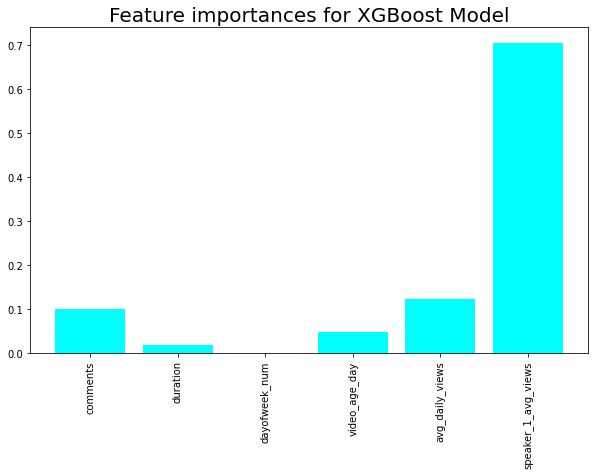

In [71]:
# getting features according to their importance in prediction
xgb_features = X_train.columns
xgb_importances = xgb_random.best_estimator_.feature_importances_
xgb_indices = np.argsort(xgb_importances)
     

plt.figure(figsize=(10,6))
plt.bar(x=xgb_features, height=xgb_importances, color='aqua')
plt.title('Feature importances for XGBoost Model', size=20)
plt.xticks(rotation='vertical')
plt.show()

**Storing all the results in a Dataframe**

In [72]:
ml_models = [{'Model Name': 'Linear Regression',
                 'Train MAE': LR_Train_MAE, 'Test MAE': LR_Test_MAE,
                 'Train MSE': LR_Train_MSE, 'Test MSE ': LR_Test_MSE,
                 'Train RMSE': LR_Train_RMSE, 'Test RMSE': LR_Test_MSE, 
                 'Train R2': LR_Train_R2, 'Test R2': LR_Test_R2,
                 'Adjusted R2': LR_Adjusted_R2},
            {'Model Name': 'Lasso Regularization',
                 'Train MAE': LA_Train_MAE, 'Test MAE': LA_Test_MAE,
                 'Train MSE': LA_Train_MSE, 'Test MSE ': LA_Test_MSE,
                 'Train RMSE': LA_Train_RMSE, 'Test RMSE': LA_Test_MSE, 
                 'Train R2': LA_Train_R2, 'Test R2': LA_Test_R2,
                 'Adjusted R2': LA_Adjusted_R2},
            {'Model Name': 'Ridge Regularization',
                 'Train MAE': RR_Train_MAE, 'Test MAE': RR_Test_MAE,
                 'Train MSE': RR_Train_MSE, 'Test MSE ': RR_Test_MSE,
                 'Train RMSE': RR_Train_RMSE, 'Test RMSE': RR_Test_MSE, 
                 'Train R2': RR_Train_R2, 'Test R2': RR_Test_R2,
                 'Adjusted R2': RR_Adjusted_R2},
            {'Model Name': 'Elastic Net Regularization',
                 'Train MAE': ER_Train_MAE, 'Test MAE': ER_Test_MAE,
                 'Train MSE': ER_Train_MSE, 'Test MSE ': ER_Test_MSE,
                 'Train RMSE': ER_Train_RMSE, 'Test RMSE': ER_Test_MSE, 
                 'Train R2': ER_Train_R2, 'Test R2': ER_Test_R2,
                 'Adjusted R2': ER_Adjusted_R2},
            {'Model Name': 'Decision Tree Regression',
                 'Train MAE': DTR_Train_MAE, 'Test MAE': DTR_Test_MAE,
                 'Train MSE': DTR_Train_MSE, 'Test MSE ': DTR_Test_MSE,
                 'Train RMSE': DTR_Train_RMSE, 'Test RMSE': DTR_Test_MSE, 
                 'Train R2': DTR_Train_R2, 'Test R2': DTR_Test_R2,
                 'Adjusted R2': DTR_Adjusted_R2},
            {'Model Name': 'Random Forest Regression',
                 'Train MAE': RFR_Train_MAE, 'Test MAE': RFR_Test_MAE,
                 'Train MSE': RFR_Train_MSE, 'Test MSE ': RFR_Test_MSE,
                 'Train RMSE': RFR_Train_RMSE, 'Test RMSE': RFR_Test_MSE, 
                 'Train R2': RFR_Train_R2, 'Test R2': RFR_Test_R2,
                 'Adjusted R2': RFR_Adjusted_R2},
            {'Model Name': 'Gradient Boost Regression',
                 'Train MAE': GB_Train_MAE, 'Test MAE': GB_Test_MAE,
                 'Train MSE': GB_Train_MSE, 'Test MSE ': GB_Test_MSE,
                 'Train RMSE': GB_Train_RMSE, 'Test RMSE': GB_Test_MSE, 
                 'Train R2': GB_Train_R2, 'Test R2': GB_Test_R2,
                 'Adjusted R2': GB_Adjusted_R2},
            {'Model Name': 'XG Boost Regression',
                 'Train MAE': XG_Train_MAE, 'Test MAE': XG_Test_MAE,
                 'Train MSE': XG_Train_MSE, 'Test MSE ': XG_Test_MSE,
                 'Train RMSE': XG_Train_RMSE, 'Test RMSE': XG_Test_MSE, 
                 'Train R2': XG_Train_R2, 'Test R2': XG_Test_R2,
                 'Adjusted R2': XG_Adjusted_R2}]

In [73]:
conclusion_df = pd.DataFrame(ml_models)

In [74]:
conclusion_df

,Model Name,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2,Test R2,Adjusted R2
0,Linear Regression,520942.118034,506016.221520,2.465262e+12,2.161158e+12,1.570115e+06,2.161158e+12,0.804046,0.766739,0.764975
1,Lasso Regularization,520942.118034,506016.221520,2.465262e+12,2.161158e+12,1.570115e+06,2.161158e+12,0.804046,0.766739,0.764975
2,Ridge Regularization,515877.706236,499442.225632,2.466593e+12,2.156906e+12,1.570539e+06,2.156906e+12,0.803940,0.767198,0.765437
3,Elastic Net Regularization,516223.518869,499899.501310,2.466299e+12,2.157268e+12,1.570446e+06,2.157268e+12,0.803963,0.767159,0.765398
4,Decision Tree Regression,560377.796207,669496.991470,1.683418e+12,5.755480e+12,1.297466e+06,5.755480e+12,0.866191,0.378793,0.374093
5,Random Forest Regression,258096.575634,362071.935036,8.012523e+11,2.227327e+12,8.951270e+05,2.227327e+12,0.936311,0.759598,0.757779
6,Gradient Boost Regression,167045.371292,301298.393373,1.085968e+11,1.625701e+12,3.295403e+05,1.625701e+12,0.991368,0.824533,0.823205
7,XG Boost Regression,225543.326989,341913.934944,2.368744e+11,1.782728e+12,4.866975e+05,1.782728e+12,0.981172,0.807585,0.806129


# **CONCLUSION:**
